# Exploring the Traffic Accident Trends in India between 2001 to 2014
## Motivation
Learn from the past trends, know about the areas of risk and possibly discover actionable insights to help reduce accidents 

Dataset: [Accidents in India | Kaggle](https://www.kaggle.com/rajanand/accidents-in-india)



(work in progress)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Load and peek into the dataset

In [2]:
data = pd.read_csv('Viz-TrafficAccidents-2001-2014.csv')
print('Dataset # of rows and columns: ' + str(data.shape))
print('\nNull values per column...\n' + str(data.isnull().sum()))

Dataset # of rows and columns: (1473, 12)

Null values per column...
STATE/UT             0
YEAR                 0
TYPE                 0
0-3 hrs. (Night)     0
3-6 hrs. (Night)     0
6-9 hrs (Day)        0
9-12 hrs (Day)       0
12-15 hrs (Day)      0
15-18 hrs (Day)      0
18-21 hrs (Night)    0
21-24 hrs (Night)    0
Total                0
dtype: int64


## The dataset has 12 attributes and 1473 observations, and doesn't have null values. But if there were any null values..
- In case there were null values in one of the columns of a particular row, we could have filled it with median of values in rest of the years for the corresponding Region, Type and Time Window Column. And then update the total
- If a total was missing, first we will update the missing values in the corresponding row and then update the total appropriately
- Similarly, any null values can be replaced with derived rough approximations based on corresponding existing figures

## Rename the columns so that we can refer them easily in our further explroation

In [3]:
data.rename(columns={'STATE/UT': 'Region', 'YEAR': 'Year', 'TYPE':'Type', '0-3 hrs. (Night)':'0_3', '3-6 hrs. (Night)':'3_6', '6-9 hrs (Day)':'6_9', '9-12 hrs (Day)':'9_12', '12-15 hrs (Day)':'12_15', '15-18 hrs (Day)':'15_18', '18-21 hrs (Night)':'18_21', '21-24 hrs (Night)':'21_24'}, inplace=True)
print('Renamed Columns: ' + str(list(data.columns)))

Renamed Columns: ['Region', 'Year', 'Type', '0_3', '3_6', '6_9', '9_12', '12_15', '15_18', '18_21', '21_24', 'Total']


## Preview top 5 rows of data

In [4]:
data.head(5)

,Region,Year,Type,0_3,3_6,6_9,9_12,12_15,15_18,18_21,21_24,Total
0,Andhra Pradesh,2001,Road Accidents,2239,3265,3198,3729,3604,3792,4098,3263,27188
1,Andhra Pradesh,2001,Rail-Road Accidents,102,76,63,76,49,151,70,36,623
2,Andhra Pradesh,2001,Other Railway Accidents,92,93,108,119,92,83,46,41,674
3,Andhra Pradesh,2002,Road Accidents,2931,3857,3671,4255,4153,4778,4844,4088,32577
4,Andhra Pradesh,2002,Rail-Road Accidents,1,0,2,0,0,1,0,0,4


## Preview of random 5 rows of data

In [5]:
data.sample(5)

,Region,Year,Type,0_3,3_6,6_9,9_12,12_15,15_18,18_21,21_24,Total
104,Assam,2011,Other Railway Accidents,35,53,49,52,80,77,76,60,482
1313,Mizoram,2013,Other Railway Accidents,0,0,0,0,0,0,0,0,0
126,Bihar,2007,Road Accidents,356,739,868,866,838,918,664,382,5631
1304,Maharashtra,2013,Other Railway Accidents,553,432,1197,1326,1075,1124,1276,1182,8165
920,Uttar Pradesh,2007,Other Railway Accidents,254,369,359,339,354,298,325,287,2585


## Let's assess the spread and granularity of the data...

### Unique Region values...

In [6]:
print('Region: --> ' + str(list(data['Region'].unique())))
print('\n' + str(data['Region'].unique().size) + ' Regions in total')

Region: --> ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'A & N Islands', 'Chandigarh', 'D & N Haveli', 'Daman & Diu', 'Delhi (Ut)', 'Lakshadweep', 'Puducherry', 'Telangana']

36 Regions in total


### Unique Year values...

In [7]:
print('\nYear: --> ' + str(list(data['Year'].unique())))
print('\n' + str(data['Year'].unique().size) + ' Years in total')


Year: --> [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]

14 Years in total


### Unique Type values...

In [8]:
print('\nType: --> ' + str(list(data['Type'].unique())))
print('\n' + str(data['Type'].unique().size) + ' Types in total')


Type: --> ['Road Accidents', 'Rail-Road Accidents', 'Other Railway Accidents']

3 Types in total


<hr style="height:2px" />

## Let's start finding some insights...

<hr style="height:2px" />

#### All types of accident summaries across all regions

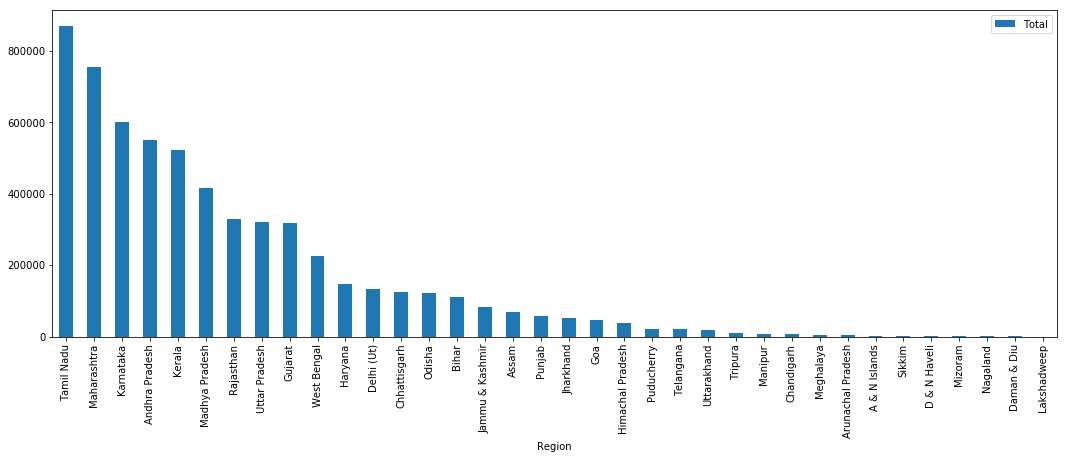

In [9]:
_data1 = (data[['Region','Total']].groupby('Region',as_index=False).agg('sum')).sort_values(['Total'], ascending=[False])
_data1.plot(kind='bar',x='Region',y='Total', figsize=(18,6))

#### Maximum Accidents happened in Tamil Nadu and almost none in D & N Haveli, Mizoram, Nagaland, Daman & Diu and Lakshadweep
These are summaries based on absolute values and shouldn't be considered in proportion or w.r.t., other regions. If we had the data on traffic density and population, it would have been possible to visualize comparitive rate of accidents in all regions. And this should be kept in mind while we go through further summaries.

<hr style="height:2px" />

#### All Road Accidents across all regions

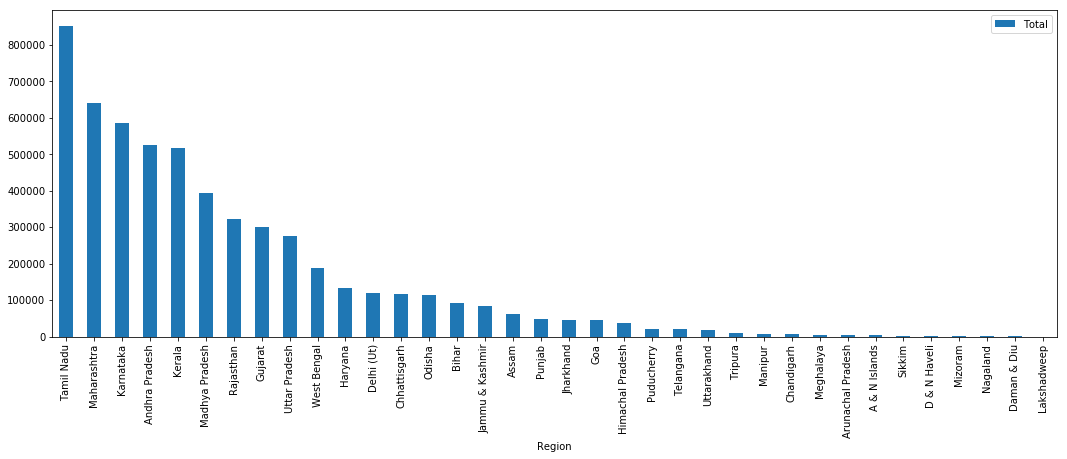

In [10]:
_data2 = ((data[['Region','Total','Type']])[data['Type']=='Road Accidents'].groupby(['Region'], as_index=False).agg('sum')).sort_values(['Total'], ascending=[False])
_data2.plot(kind='bar',x='Region',y='Total', figsize=(18,6))

#### Maximum Road Accidents happened in Tamil Nadu and almost none in D & N Haveli, Mizoram, Nagaland, Daman & Diu and Lakshadweep

<hr style="height:2px" />

#### All Rail-Road Accidents across all regions

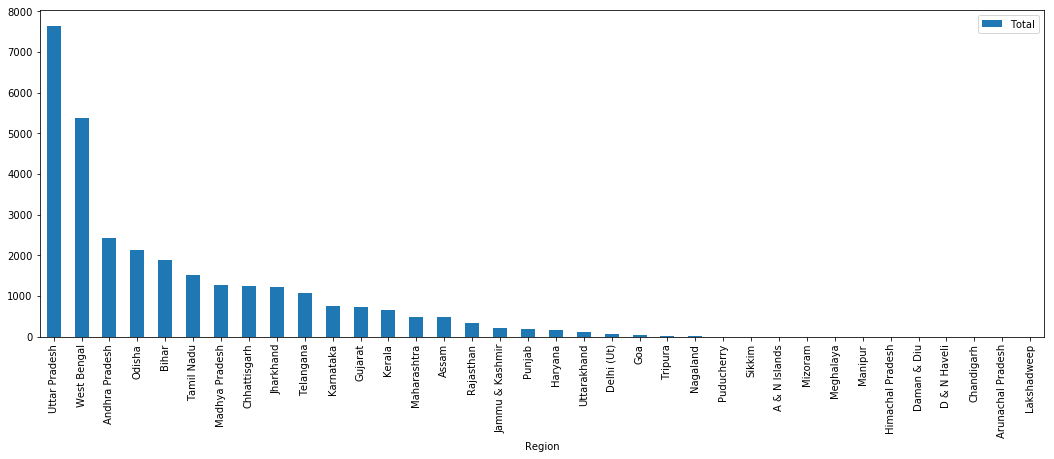

In [11]:
_data3 = ((data[['Region','Total','Type']])[data['Type']=='Rail-Road Accidents'].groupby(['Region'], as_index=False).agg('sum')).sort_values(['Total'], ascending=[False])
_data3.plot(kind='bar',x='Region',y='Total', figsize=(18,6))

#### Maximum Rail-Road Accidents happened in Uttar Pradesh and almost none in Tripura, Nagaland, Puducherry, Sikkim, A & N Islands, Mizoram, Meghalaya, Manipur, Himachal Pradesh, Daman & Diu, D & N Haveli, Chandigarh, Arunachal Pradesh and Lakshadweep

<hr style="height:2px" />

#### All Other Railway Accidents across all regions

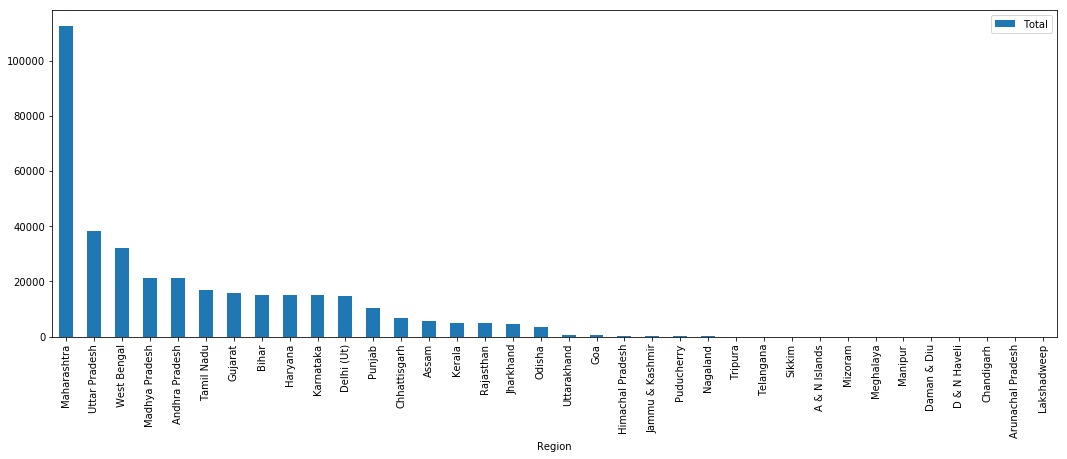

In [12]:
_data4 = ((data[['Region','Total','Type']])[data['Type']=='Other Railway Accidents'].groupby(['Region'], as_index=False).agg('sum')).sort_values(['Total'], ascending=[False])
_data4.plot(kind='bar',x='Region',y='Total', figsize=(18,6))

#### Maximum Other Railway Accidents happened in Maharashtra and almost none in Himachal Pradesh, J&K, Puducherry, Nagaland, Tripura, Telangana, Sikkim, A & N Islands, Mizoram, Meghalaya, Manipur, Daman & Diu, D & N Haveli, Chandigarh, Arunachal Pradesh and Lakshadweep

<hr style="height:2px" />

In [13]:
_data5 = data[data.Total==data[data.Type=='Road Accidents']['Total'].max()]
print('Maximum Road Accidents ' + str(_data5['Total'].values[0]) + ' happened during Year ' + str(_data5['Year'].values[0]) + ' in ' + str(_data5['Region'].values[0]))

Maximum Road Accidents 75480 happened during Year 2005 in Tamil Nadu


In [14]:
_data6 = data[data.Total==data[data.Type=='Rail-Road Accidents']['Total'].max()]
print('Maximum Rail-Road Accidents ' + str(_data6['Total'].values[0]) + ' happened during Year ' + str(_data6['Year'].values[0]) + ' in ' + str(_data6['Region'].values[0]))

Maximum Rail-Road Accidents 1262 happened during Year 2003 in Madhya Pradesh


In [15]:
_data7 = data[data.Total==data[data.Type=='Other Railway Accidents']['Total'].max()]
print('Maximum Other Railway Accidents ' + str(_data7['Total'].values[0]) + ' happened during Year ' + str(_data7['Year'].values[0]) + ' in ' + str(_data7['Region'].values[0]))

Maximum Other Railway Accidents 8584 happened during Year 2011 in Maharashtra


<hr style="height:2px" />

#### All Accidents by year (Absolute numbers)

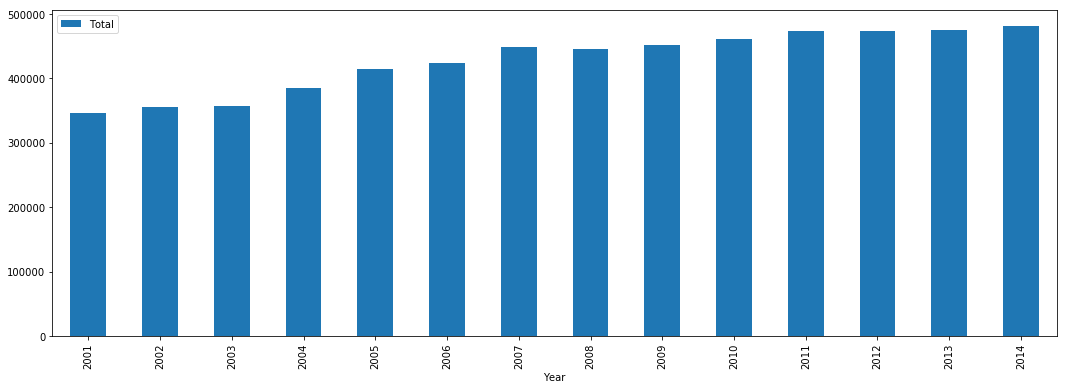

In [16]:
_data8 = ((data[['Region','Total','Type', 'Year']]).groupby(['Year'], as_index=False).agg('sum'))#.sort_values(['Total'], ascending=[False])
_data8.plot(kind='bar',x='Year',y='Total', figsize=(18,6))

#### The number of accidents are slightly increasing over time. But given the rise in overall traffic and population density at the same time, these numbers infact could be on decline. Let's try to visualize total number of accidents w.r.t., the rise in the traffic approximated using number of vehicles

In [17]:
years = list(data['Year'].unique())
totalAccidents = list(((data[['Region','Total','Type', 'Year']]).groupby(['Year'], as_index=False).agg('sum').sort_values(['Year'], ascending=[True]))['Total'])
print(totalAccidents)
#(data[['Region','Total','Type', 'Year']]).groupby(['Year'], as_index=False).agg('sum').sort_values(['Year'], ascending=[True])

[345716, 355994, 357848, 384523, 414397, 423426, 448235, 445468, 451283, 461757, 473084, 473416, 475625, 481805]


In [18]:
# These are total registered vehicles from year 2001 to 2013 all over India
# Numbers taken from dataset: https://data.gov.in/catalog/total-number-registered-motor-vehicles-india
totalVehiclesByYear = [38556, 41581, 47519, 51922, 58799, 64743, 69129, 75336, 82402, 91598, 101865, 115419, 132550]

#The dataset doesn't have total registered vehicles for year 2014. Let's find how are numbers increasing over time....
print('Total registered vehicles number is increasing by below ratio, over years...')
i = 1
while(i < len(totalVehiclesByYear)):
    print("{:0.2f}".format(totalVehiclesByYear[i]/totalVehiclesByYear[i-1]), end=', ')
    i=i+1
print('\n\nTotal number of registered vehicles from 2001 to 2014...')

#Looks like it's close to a geometric progression. We'll consider the number of registered
#vehicles for 2014 as 1.16 times the previous number, which seems to be fair
totalVehiclesByYear.append(int((totalVehiclesByYear[len(totalVehiclesByYear)-1])*1.16))
print(totalVehiclesByYear)

Total registered vehicles number is increasing by below ratio, over years...
1.08, 1.14, 1.09, 1.13, 1.10, 1.07, 1.09, 1.09, 1.11, 1.11, 1.13, 1.15, 

Total number of registered vehicles from 2001 to 2014...
[38556, 41581, 47519, 51922, 58799, 64743, 69129, 75336, 82402, 91598, 101865, 115419, 132550, 153758]


In [19]:
accidentsByTotalNumberOfVehicles = []
for i in range(14):
    accidentsByTotalNumberOfVehicles.append(float("{:0.2f}".format(totalAccidents[i]/totalVehiclesByYear[i])))

print('Relative accidents w.r.t., total registered vehicles from year 2001 to year 2014...')
print(accidentsByTotalNumberOfVehicles)

Relative accidents w.r.t., total registered vehicles from year 2001 to year 2014...
[8.97, 8.56, 7.53, 7.41, 7.05, 6.54, 6.48, 5.91, 5.48, 5.04, 4.64, 4.1, 3.59, 3.13]


<Container object of 14 artists>

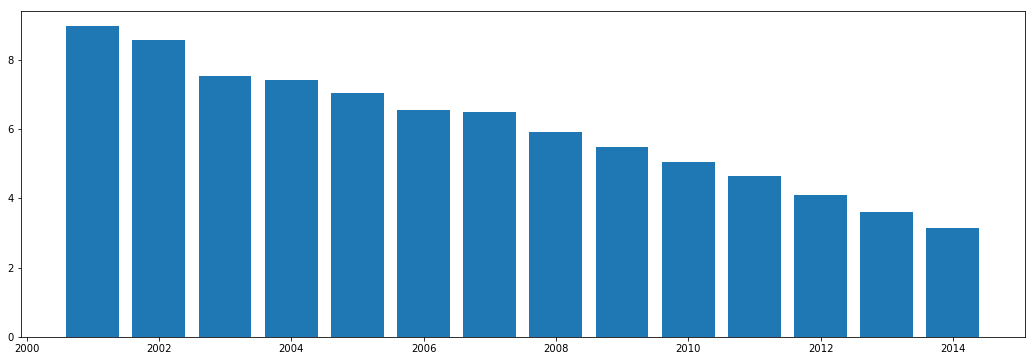

In [20]:
plt.figure(figsize=(18,6))
plt.bar(years, accidentsByTotalNumberOfVehicles)

#### So, it's good that overall accidents are declining year over year

<hr style="height:2px" />

## Region-wise...
- Let's visualize some summaries for one Region at a time.

In [21]:
# Helper Function
def SummarizeRegion(region):
    print('Getting data for \'' + region + '\' region...')
    data_region = (data[data['Region']==region]).drop('Total', axis=1, inplace=False)
    data_region[data_region.Type=='Road Accidents'].plot(title='Road Accidents', x='Year', kind='bar', figsize=(18,6)); 
    data_region[data_region.Type=='Rail-Road Accidents'].plot(title='Rail-Road Accidents', x='Year', kind='bar', figsize=(18,6)); 
    data_region[data_region.Type=='Other Railway Accidents'].plot(title='Other Railway Accidents', x='Year', kind='bar', figsize=(18,6)); 

Getting data for 'Andhra Pradesh' region...


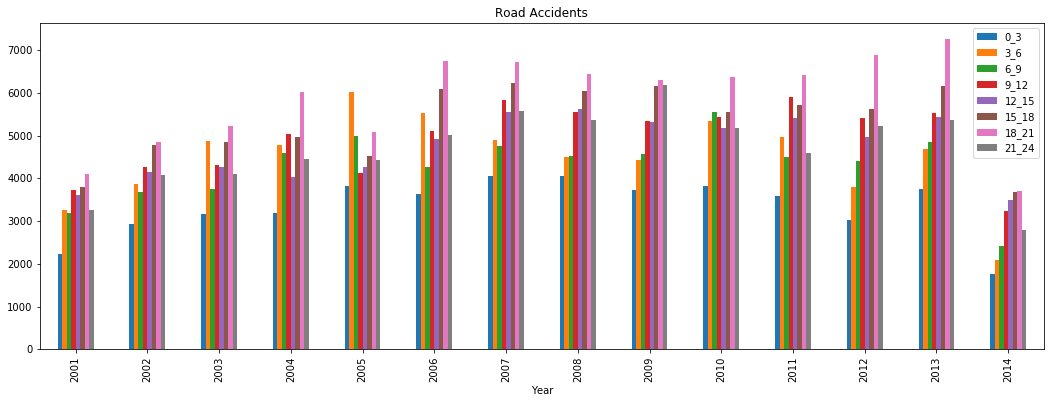

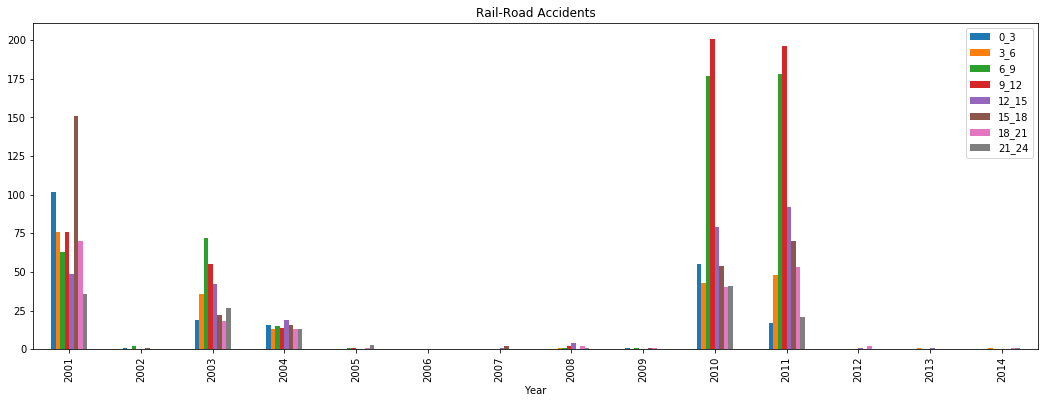

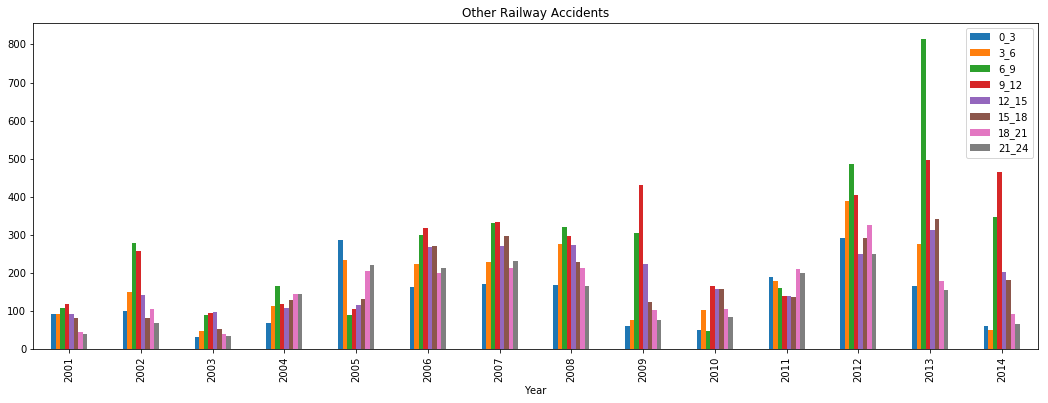

In [22]:
SummarizeRegion('Andhra Pradesh')

## Findings for "Andhra Pradesh" Region
### Road Accidents:
* **Trends by Year**...
    - Road Accidents were at peak in year 2013 over all these years, immediately followed by lowest accidents in 2014
    - Year 2005 was a little different where most of the accidents happened between 3AM TO 6AM


* **Trends by Time of day**
    - Evening 6PM to 9PM is the most risky time, consistent across years. Closely followed by 3PM to 6PM and 9PM to 12AM, most of the years. Probably due to poor lighting conditions and opposing traffic lighting glare in the evenings/nights.
    - There are least accidents between 12AM and 3AM

### Rail-Road Accidents:
* **Trends by Year**...
    - Rail-Road Accidents were at peak in year 2010, closely followed by 2011. Except 2001, 2003 and 2004. Rail-Road accidents were negligible


* **Trends by Time of day**
    - 9AM to 12PM was the most risky time in 2010 and 2011, closely followed by 6AM to 9AM

### Other Railway Accidents:
* **Trends by Year**...
    - Other Railway Accidents were at peak in year 2013, while year 2003 had lowest Other Railway Accidents. For the rest of the years, the number of Other Railway Accidents didn't vary much.


* **Trends by Time of day**
    - 6AM to 12PM was the most risky time almost throughout